#Introduction


Section 1.1 of the NLTK book describes some pre-loaded books and pre-defined functions that come with them.  Section 1.2 reviews fundamental concepts about python lists and strings -- if you need to brush up on these concepts, then study this subsection carefully.  Be sure you know the difference between a *set* and a *list* and that you can work easily with python slices.

The part that I am most interested in having you focus on is Section 1.3, which introduces NLTK's frequency distribution data structure.  You need to have the books loaded and accessible from section 1.1 for this part to work.

##NLTK's Frequency Distribution Object

This data structure makes it easy to tally up frequencies across words and other items, and incorporate them into list comprehensions (and later we'll see the conditional frequency distribution as well).

These are the functions supported by FreqDis:

```
fdist = FreqDist(samples) create a frequency distribution containing the given samples
fdist[sample] += 1	increment the count for this sample
fdist['monstrous']	count of the number of times a given sample occurred
fdist.freq('monstrous')	frequency of a given sample
fdist.N()	total number of samples
fdist.most_common(n)	the n most common samples and their frequencies
for sample in fdist:	iterate over the samples
fdist.max()	sample with the greatest count
fdist.tabulate()	tabulate the frequency distribution
fdist.plot()	graphical plot of the frequency distribution
fdist.plot(cumulative=True)	cumulative plot of the frequency distribution
fdist1 |= fdist2	update fdist1 with counts from fdist2
fdist1 < fdist2	test if samples in fdist1 occur less frequently than in fdist2
```
The code below counts up all of the words in *Monty Python and the Holy Grail* (text6 in the nltk.book collection) and the final line shows the top 50 most frequent.

In [3]:
import nltk
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

In [4]:
%matplotlib inline
import matplotlib
from nltk.book import *        # loads in pre-defined texts
mp_freqdist = FreqDist(text6)  # compute the frequency distribution
mp_freqdist.most_common(50)      # show the top 50 (word, frequency) pairs

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[(':', 1197),
 ('.', 816),
 ('!', 801),
 (',', 731),
 ("'", 421),
 ('[', 319),
 (']', 312),
 ('the', 299),
 ('I', 255),
 ('ARTHUR', 225),
 ('?', 207),
 ('you', 204),
 ('a', 188),
 ('of', 158),
 ('--', 148),
 ('to', 144),
 ('s', 141),
 ('and', 135),
 ('#', 127),
 ('...', 118),
 ('Oh', 110),
 ('it', 107),
 ('is', 106),
 ('-', 88),
 ('in', 86),
 ('that', 84),
 ('t', 77),
 ('1', 76),
 ('LAUNCELOT', 76),
 ('No', 76),
 ('your', 75),
 ('not', 70),
 ('GALAHAD', 69),
 ('KNIGHT', 68),
 ('What', 65),
 ('FATHER', 63),
 ('we', 62),
 ('You', 61),
 ('BEDEVERE', 61),
 ('We', 60),
 ('this', 59),
 ('no', 55),
 ('Well', 54),
 ('HEAD', 54),
 ('GUARD', 53),
 ('have', 53),
 ('Sir', 52),
 ('are', 52),
 ('And', 50),
 ('A', 50)]

**Task 1** Wow, those are some weird results.  It might make some sense to look at the actual text itself.  In the line below, write a line of code that pulls out the first 500 words of the text and shows them to you (hint: the text object is simply a list of strings).

In [11]:
" ".join(text6[:500])

"SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there ! [ clop clop clop ] SOLDIER # 1 : Halt ! Who goes there ? ARTHUR : It is I , Arthur , son of Uther Pendragon , from the castle of Camelot . King of the Britons , defeator of the Saxons , sovereign of all England ! SOLDIER # 1 : Pull the other one ! ARTHUR : I am , ... and this is my trusty servant Patsy . We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot . I must speak with your lord and master . SOLDIER # 1 : What ? Ridden on a horse ? ARTHUR : Yes ! SOLDIER # 1 : You ' re using coconuts ! ARTHUR : What ? SOLDIER # 1 : You ' ve got two empty halves of coconut and you ' re bangin ' ' em together . ARTHUR : So ? We have ridden since the snows of winter covered this land , through the kingdom of Mercea , through -- SOLDIER # 1 : Where ' d you get the coconuts ? ARTHUR : We found them . SOLDIER # 1 : Found them ? In Mercea ? The coconut ' s tropical ! ARTHUR : What

**Task 2** Now that you've looked at the text, what are two reasons for these strange results?

*Your Answer 1 goes here: Because it includes stage directions. (ex: [wind], [clop clop clop])

*Your Answer 2 goes here: It is includes the speaker of the dialouge. (ex: "Arthur: ", "SOLDIER # 1 :")


**Task 3** Address one of the problems by modifying the text of Monty Python and rerunning the frequency distribution calculation.  In the box below write your code to modify the text:

In [40]:
import string
exclude = list(string.punctuation) + list(["--","..."]) + list(string.digits)

# Ignore 1) upper case words that are used for character names used to indicate which character is speaking
# 2) Punctuations and digits
filtered_text6 = list(filter(lambda x: (not(x.isupper()) and not(x in exclude)), text6))

**Task 4** In the box below, show the output after applying this version of the text to a FreqDist.

In [41]:
mp_freqdist = FreqDist(filtered_text6)  # compute the frequency distribution
mp_freqdist.most_common(50)      # show the top 50 (word, frequency) pairs

[('the', 299),
 ('you', 204),
 ('a', 188),
 ('of', 158),
 ('to', 144),
 ('s', 141),
 ('and', 135),
 ('Oh', 110),
 ('it', 107),
 ('is', 106),
 ('in', 86),
 ('that', 84),
 ('t', 77),
 ('No', 76),
 ('your', 75),
 ('not', 70),
 ('What', 65),
 ('we', 62),
 ('You', 61),
 ('We', 60),
 ('this', 59),
 ('no', 55),
 ('Well', 54),
 ('have', 53),
 ('Sir', 52),
 ('are', 52),
 ('And', 50),
 ('Ni', 47),
 ('on', 47),
 ('me', 46),
 ('He', 46),
 ('boom', 45),
 ('be', 43),
 ('he', 43),
 ('Yes', 42),
 ('ha', 42),
 ('re', 41),
 ('her', 40),
 ('clop', 39),
 ('with', 38),
 ('away', 38),
 ('my', 38),
 ('witch', 37),
 ('Arthur', 36),
 ('up', 36),
 ('It', 35),
 ('here', 34),
 ('m', 34),
 ('him', 34),
 ('do', 34)]

**Task 5** How if at all has the output changed?

*Your Answer Goes Here: The filtering removed most of the punctuation and the character names from the frequency list. However, there are still some weird characters such as "s", "t", and "re" that require more investigation.

**Task 6** Following the example from the book, show a cumulative frequency plot for the words in Monty Python as newly computed, in the box below.

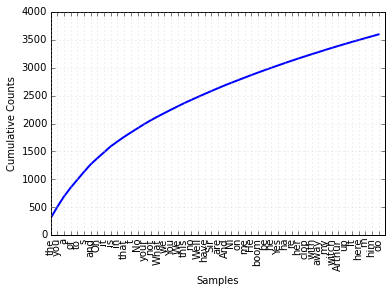

In [42]:
mp_freqdist.plot(50, cumulative=True)

**Task 7** In the box below, write a list comprehension that users the FreqDist you computed above to find all words in *Monty Python* that are longer than 5 characters long and occur at least 5 times (hint: the text shows how to do a variation of this).  
Show the output sorted in alphabetical order.

In [47]:
vocab_text6 = set(filtered_text6)
long_words = [w for w in vocab_text6 if len(w) > 5 and mp_freqdist[w] > 5]
sorted(long_words)

['Aaaaugh',
 'Arthur',
 'Bedevere',
 'Bridge',
 'Britons',
 'Camelot',
 'Castle',
 'Concorde',
 'English',
 'French',
 'Galahad',
 'Knight',
 'Knights',
 'Launcelot',
 'Please',
 'afraid',
 'angels',
 'better',
 'castle',
 'chanting',
 'coconut',
 'course',
 'domine',
 'dramatic',
 'father',
 'giggle',
 'killed',
 'knights',
 'mumble',
 'nothing',
 'people',
 'please',
 'questions',
 'rabbit',
 'really',
 'requiem',
 'sacred',
 'saying',
 'second',
 'shrubbery',
 'singing',
 'spanking',
 'squeak',
 'swallow',
 'through']